In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
%matplotlib inline
from utils import api_key, get_symbols
import numpy as np
import ta

In [2]:
out = get_symbols(['AAPL', 'CSCO'], source='quandl', start='2015-01-01', end='2017-01-01')
prices = out.sort_index()
prices

open        high         low       close      volume
date       symbol                                                            
2015-01-02 AAPL    105.820966  105.868466  101.982949  103.863957  53204626.0
           CSCO     25.385655   25.622564   24.948286   25.157859  22926512.0
2015-01-05 AAPL    102.875953  103.217954  100.139941  100.937944  64285491.0
           CSCO     24.893615   25.012069   24.602035   24.656706  29460603.0
2015-01-06 AAPL    101.213446  102.058949   99.398938  100.947444  65797116.0
...                       ...         ...         ...         ...         ...
2016-12-28 CSCO     29.639438   29.707020   29.301529   29.369111  12022231.0
2016-12-29 AAPL    115.011672  115.663027  114.962290  115.288214  15039519.0
           CSCO     29.320838   29.494620   29.282220   29.407729  10995584.0
2016-12-30 AAPL    115.209202  115.752409  114.004271  114.389454  30586265.0
           CSCO     29.504275   29.542893   29.089130   29.176020  20190029.0

[1008 rows x 5 columns]

In [3]:
def ema(span):
    return lambda x: x.ewm(span=span).mean()

In [46]:
features = pd.DataFrame(index = prices.index)
groupby_sym = prices.groupby('symbol')


features['f01'] = prices.close / prices.open - 1 ### daily return
features['f02'] = prices.open / prices.groupby('symbol').close.shift(1) - 1 ### something else (prices)
features['f11'] = prices.volume.apply(np.log)
features['f12'] = prices.groupby('symbol').volume.diff(1)
features['f13'] = prices.groupby('symbol').volume.diff(30)

# The EMAs
for i in range(1, 2, 1):
    features[f'f2{i}'] = prices.groupby('symbol').close.apply( ema(5 * (2**i) ))


features.dropna(inplace=True)
features

f01       f02        f11         f12         f13  \
date       symbol                                                          
2015-02-17 AAPL    0.002667  0.003226  17.961061   8880186.0   9947779.0   
           CSCO    0.001709 -0.005776  17.348239 -16439484.0  11290673.0   
2015-02-18 AAPL    0.008541 -0.001604  17.619764 -18260668.0 -19393754.0   
           CSCO    0.010277 -0.004094  17.014336  -9713448.0  -4956866.0   
2015-02-19 AAPL   -0.000233 -0.001826  17.436175  -7529356.0 -28434735.0   
...                     ...       ...        ...         ...         ...   
2016-12-28 CSCO   -0.009121  0.000652  16.302268  -2153257.0 -10895334.0   
2016-12-29 AAPL    0.002404 -0.002655  16.526192  -5866373.0 -17224991.0   
           CSCO    0.002963 -0.001644  16.213004  -1026647.0 -13164571.0   
2016-12-30 AAPL   -0.007115 -0.000685  17.236062  15546746.0 -28254257.0   
           CSCO   -0.011126  0.003283  16.820699   9194445.0  -6907111.0   

                          f21  
date       symbol              
2015-02-17 AAPL    117.272046  
           CSCO     25.668187  
2015-02-18 AAPL    118.271292  
           CSCO     25.887216  
2015-02-19 AAPL    119.042304  
...                       ...  
2016-12-28 CSCO     29.414411  
2016-12-29 AAPL    114.755002  
           CSCO     29.413196  
2016-12-30 AAPL    114.688538  
           CSCO     29.370074  

[948 rows x 6 columns]

In [47]:
### applying non-peeky z-score
def zscore_rolling_fxn(window, min_periods):
    return (lambda x: (x-x.rolling(window=window, min_periods=min_periods)
.mean()) / x.rolling(window=window, min_periods=min_periods).std())

f01       f02        f11         f12         f13  \
date       symbol                                                          
2015-02-17 AAPL    0.002667  0.003226  17.961061   8880186.0   9947779.0   
           CSCO    0.001709 -0.005776  17.348239 -16439484.0  11290673.0   
2015-02-18 AAPL    0.008541 -0.001604  17.619764 -18260668.0 -19393754.0   
           CSCO    0.010277 -0.004094  17.014336  -9713448.0  -4956866.0   
2015-02-19 AAPL   -0.000233 -0.001826  17.436175  -7529356.0 -28434735.0   
...                     ...       ...        ...         ...         ...   
2016-12-28 CSCO   -0.009121  0.000652  16.302268  -2153257.0 -10895334.0   
2016-12-29 AAPL    0.002404 -0.002655  16.526192  -5866373.0 -17224991.0   
           CSCO    0.002963 -0.001644  16.213004  -1026647.0 -13164571.0   
2016-12-30 AAPL   -0.007115 -0.000685  17.236062  15546746.0 -28254257.0   
           CSCO   -0.011126  0.003283  16.820699   9194445.0  -6907111.0   

                          f21       f31  
date       symbol                        
2015-02-17 AAPL    117.272046  1.980303  
           CSCO     25.668187  2.180092  
2015-02-18 AAPL    118.271292  1.943548  
           CSCO     25.887216  2.179616  
2015-02-19 AAPL    119.042304  1.779767  
...                       ...       ...  
2016-12-28 CSCO     29.414411  0.638681  
2016-12-29 AAPL    114.755002  1.446918  
           CSCO     29.413196  0.655827  
2016-12-30 AAPL    114.688538  1.317870  
           CSCO     29.370074  0.498654  

[948 rows x 7 columns]

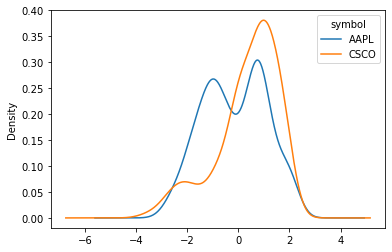

In [48]:
features['f31'] = groupby_sym.close.apply(zscore_rolling_fxn(200, 30))

features['f31'].unstack().plot.kde()
features

In [49]:
features['f41'] = ta.momentum.RSIIndicator(groupby_sym.get_group('AAPL').close).rsi()
features['f42'] = ta.momentum.RSIIndicator(groupby_sym.get_group('CSCO').close).rsi()

features

f01       f02        f11         f12         f13  \
date       symbol                                                          
2015-02-17 AAPL    0.002667  0.003226  17.961061   8880186.0   9947779.0   
           CSCO    0.001709 -0.005776  17.348239 -16439484.0  11290673.0   
2015-02-18 AAPL    0.008541 -0.001604  17.619764 -18260668.0 -19393754.0   
           CSCO    0.010277 -0.004094  17.014336  -9713448.0  -4956866.0   
2015-02-19 AAPL   -0.000233 -0.001826  17.436175  -7529356.0 -28434735.0   
...                     ...       ...        ...         ...         ...   
2016-12-28 CSCO   -0.009121  0.000652  16.302268  -2153257.0 -10895334.0   
2016-12-29 AAPL    0.002404 -0.002655  16.526192  -5866373.0 -17224991.0   
           CSCO    0.002963 -0.001644  16.213004  -1026647.0 -13164571.0   
2016-12-30 AAPL   -0.007115 -0.000685  17.236062  15546746.0 -28254257.0   
           CSCO   -0.011126  0.003283  16.820699   9194445.0  -6907111.0   

                          f21       f31        f41        f42  
date       symbol                                              
2015-02-17 AAPL    117.272046  1.980303  77.565772        NaN  
           CSCO     25.668187  2.180092        NaN  64.020935  
2015-02-18 AAPL    118.271292  1.943548  78.576942        NaN  
           CSCO     25.887216  2.179616        NaN  65.146966  
2015-02-19 AAPL    119.042304  1.779767  77.451226        NaN  
...                       ...       ...        ...        ...  
2016-12-28 CSCO     29.414411  0.638681        NaN  51.120161  
2016-12-29 AAPL    114.755002  1.446918  64.088572        NaN  
           CSCO     29.413196  0.655827        NaN  51.902140  
2016-12-30 AAPL    114.688538  1.317870  57.884634        NaN  
           CSCO     29.370074  0.498654        NaN  47.039585  

[948 rows x 9 columns]

In [50]:
for i in range(len(features)):
    if str(features.f41.iloc[i]) == 'nan':
        features.f41.iloc[i] = features.f42.iloc[i]
    else:
        features.f42.iloc[i] = features.f41.iloc[i]

features = features[features.columns[~features.columns.isin(['f42'])]]

In [51]:
features

f01       f02        f11         f12         f13  \
date       symbol                                                          
2015-02-17 AAPL    0.002667  0.003226  17.961061   8880186.0   9947779.0   
           CSCO    0.001709 -0.005776  17.348239 -16439484.0  11290673.0   
2015-02-18 AAPL    0.008541 -0.001604  17.619764 -18260668.0 -19393754.0   
           CSCO    0.010277 -0.004094  17.014336  -9713448.0  -4956866.0   
2015-02-19 AAPL   -0.000233 -0.001826  17.436175  -7529356.0 -28434735.0   
...                     ...       ...        ...         ...         ...   
2016-12-28 CSCO   -0.009121  0.000652  16.302268  -2153257.0 -10895334.0   
2016-12-29 AAPL    0.002404 -0.002655  16.526192  -5866373.0 -17224991.0   
           CSCO    0.002963 -0.001644  16.213004  -1026647.0 -13164571.0   
2016-12-30 AAPL   -0.007115 -0.000685  17.236062  15546746.0 -28254257.0   
           CSCO   -0.011126  0.003283  16.820699   9194445.0  -6907111.0   

                          f21       f31        f41  
date       symbol                                   
2015-02-17 AAPL    117.272046  1.980303  77.565772  
           CSCO     25.668187  2.180092  64.020935  
2015-02-18 AAPL    118.271292  1.943548  78.576942  
           CSCO     25.887216  2.179616  65.146966  
2015-02-19 AAPL    119.042304  1.779767  77.451226  
...                       ...       ...        ...  
2016-12-28 CSCO     29.414411  0.638681  51.120161  
2016-12-29 AAPL    114.755002  1.446918  64.088572  
           CSCO     29.413196  0.655827  51.902140  
2016-12-30 AAPL    114.688538  1.317870  57.884634  
           CSCO     29.370074  0.498654  47.039585  

[948 rows x 8 columns]

In [52]:
##### month_of_year

moy = prices.index.get_level_values('date').month
ohe_frame = pd.DataFrame(
    pd.get_dummies(moy),
    )

ohe_frame.columns = [f'f5{i}'for i in range(1,13)]

In [53]:
ohe_frame = ohe_frame.loc[ len(ohe_frame) - len(features) : len(ohe_frame)].reset_index(drop=True, inplace=False)

ohe_frame

,f51,f52,f53,f54,f55,f56,f57,f58,f59,f510,f511,f512
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
943,0,0,0,0,0,0,0,0,0,0,0,1
944,0,0,0,0,0,0,0,0,0,0,0,1
945,0,0,0,0,0,0,0,0,0,0,0,1
946,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
features_noindex = features.reset_index(drop=True, inplace=False)
features_noindex

,f01,f02,f11,f12,f13,f21,f31,f41
0,0.002667,0.003226,17.961061,8880186.0,9947779.0,117.272046,1.980303,77.565772
1,0.001709,-0.005776,17.348239,-16439484.0,11290673.0,25.668187,2.180092,64.020935
2,0.008541,-0.001604,17.619764,-18260668.0,-19393754.0,118.271292,1.943548,78.576942
3,0.010277,-0.004094,17.014336,-9713448.0,-4956866.0,25.887216,2.179616,65.146966
4,-0.000233,-0.001826,17.436175,-7529356.0,-28434735.0,119.042304,1.779767,77.451226
...,...,...,...,...,...,...,...,...
943,-0.009121,0.000652,16.302268,-2153257.0,-10895334.0,29.414411,0.638681,51.120161
944,0.002404,-0.002655,16.526192,-5866373.0,-17224991.0,114.755002,1.446918,64.088572
945,0.002963,-0.001644,16.213004,-1026647.0,-13164571.0,29.413196,0.655827,51.902140
946,-0.007115,-0.000685,17.236062,15546746.0,-28254257.0,114.688538,1.317870,57.884634


In [55]:
new_features = pd.merge(left=features_noindex, right=ohe_frame, how='right', left_index=True, right_index=True)
new_features

,f01,f02,f11,f12,f13,f21,f31,f41,f51,f52,f53,f54,f55,f56,f57,f58,f59,f510,f511,f512
0,0.002667,0.003226,17.961061,8880186.0,9947779.0,117.272046,1.980303,77.565772,0,1,0,0,0,0,0,0,0,0,0,0
1,0.001709,-0.005776,17.348239,-16439484.0,11290673.0,25.668187,2.180092,64.020935,0,1,0,0,0,0,0,0,0,0,0,0
2,0.008541,-0.001604,17.619764,-18260668.0,-19393754.0,118.271292,1.943548,78.576942,0,1,0,0,0,0,0,0,0,0,0,0
3,0.010277,-0.004094,17.014336,-9713448.0,-4956866.0,25.887216,2.179616,65.146966,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.000233,-0.001826,17.436175,-7529356.0,-28434735.0,119.042304,1.779767,77.451226,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,-0.009121,0.000652,16.302268,-2153257.0,-10895334.0,29.414411,0.638681,51.120161,0,0,0,0,0,0,0,0,0,0,0,1
944,0.002404,-0.002655,16.526192,-5866373.0,-17224991.0,114.755002,1.446918,64.088572,0,0,0,0,0,0,0,0,0,0,0,1
945,0.002963,-0.001644,16.213004,-1026647.0,-13164571.0,29.413196,0.655827,51.902140,0,0,0,0,0,0,0,0,0,0,0,1
946,-0.007115,-0.000685,17.236062,15546746.0,-28254257.0,114.688538,1.317870,57.884634,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
new_features = new_features.set_index(features.index)

In [57]:
new_features

f01       f02        f11         f12         f13  \
date       symbol                                                          
2015-02-17 AAPL    0.002667  0.003226  17.961061   8880186.0   9947779.0   
           CSCO    0.001709 -0.005776  17.348239 -16439484.0  11290673.0   
2015-02-18 AAPL    0.008541 -0.001604  17.619764 -18260668.0 -19393754.0   
           CSCO    0.010277 -0.004094  17.014336  -9713448.0  -4956866.0   
2015-02-19 AAPL   -0.000233 -0.001826  17.436175  -7529356.0 -28434735.0   
...                     ...       ...        ...         ...         ...   
2016-12-28 CSCO   -0.009121  0.000652  16.302268  -2153257.0 -10895334.0   
2016-12-29 AAPL    0.002404 -0.002655  16.526192  -5866373.0 -17224991.0   
           CSCO    0.002963 -0.001644  16.213004  -1026647.0 -13164571.0   
2016-12-30 AAPL   -0.007115 -0.000685  17.236062  15546746.0 -28254257.0   
           CSCO   -0.011126  0.003283  16.820699   9194445.0  -6907111.0   

                          f21       f31        f41  f51  f52  f53  f54  f55  \
date       symbol                                                             
2015-02-17 AAPL    117.272046  1.980303  77.565772    0    1    0    0    0   
           CSCO     25.668187  2.180092  64.020935    0    1    0    0    0   
2015-02-18 AAPL    118.271292  1.943548  78.576942    0    1    0    0    0   
           CSCO     25.887216  2.179616  65.146966    0    1    0    0    0   
2015-02-19 AAPL    119.042304  1.779767  77.451226    0    1    0    0    0   
...                       ...       ...        ...  ...  ...  ...  ...  ...   
2016-12-28 CSCO     29.414411  0.638681  51.120161    0    0    0    0    0   
2016-12-29 AAPL    114.755002  1.446918  64.088572    0    0    0    0    0   
           CSCO     29.413196  0.655827  51.902140    0    0    0    0    0   
2016-12-30 AAPL    114.688538  1.317870  57.884634    0    0    0    0    0   
           CSCO     29.370074  0.498654  47.039585    0    0    0    0    0   

                   f56  f57  f58  f59  f510  f511  f512  
date       symbol                                        
2015-02-17 AAPL      0    0    0    0     0     0     0  
           CSCO      0    0    0    0     0     0     0  
2015-02-18 AAPL      0    0    0    0     0     0     0  
           CSCO      0    0    0    0     0     0     0  
2015-02-19 AAPL      0    0    0    0     0     0     0  
...                ...  ...  ...  ...   ...   ...   ...  
2016-12-28 CSCO      0    0    0    0     0     0     1  
2016-12-29 AAPL      0    0    0    0     0     0     1  
           CSCO      0    0    0    0     0     0     1  
2016-12-30 AAPL      0    0    0    0     0     0     1  
           CSCO      0    0    0    0     0     0     1  

[948 rows x 20 columns]

<h1> *** Feature selection *** </h1>

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(new_features)
df = pd.DataFrame(features_scaled, index=new_features.index)
df.columns = new_features.columns

<h2>Creating outcome table</h2>

In [59]:
outcome = pd.Series(prices.close, name='outcome')
outcome_scaled = std_scaler.fit_transform(outcome.to_frame())
outcome_scaled = pd.DataFrame(
    outcome_scaled, 
    index=outcome.to_frame().index,
    columns=['close'],
    )
outcome_scaled

close
date       symbol          
2015-01-02 AAPL    0.869894
           CSCO   -1.019058
2015-01-05 AAPL    0.799669
           CSCO   -1.031086
2015-01-06 AAPL    0.799897
...                     ...
2016-12-28 CSCO   -0.917988
2016-12-29 AAPL    1.144077
           CSCO   -0.917061
2016-12-30 AAPL    1.122507
           CSCO   -0.922622

[1008 rows x 1 columns]

Correlation of features with the close prices


&lt;AxesSubplot:title={&#39;center&#39;:&#39;Strength of correlation of features with the close price&#39;}&gt;

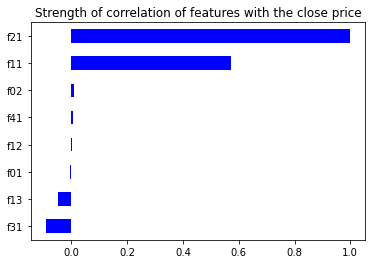

In [60]:
corrs = features.corrwith(outcome)
corrs.sort_values().plot.barh(color='blue', title='Strength of correlation of features with the close price')



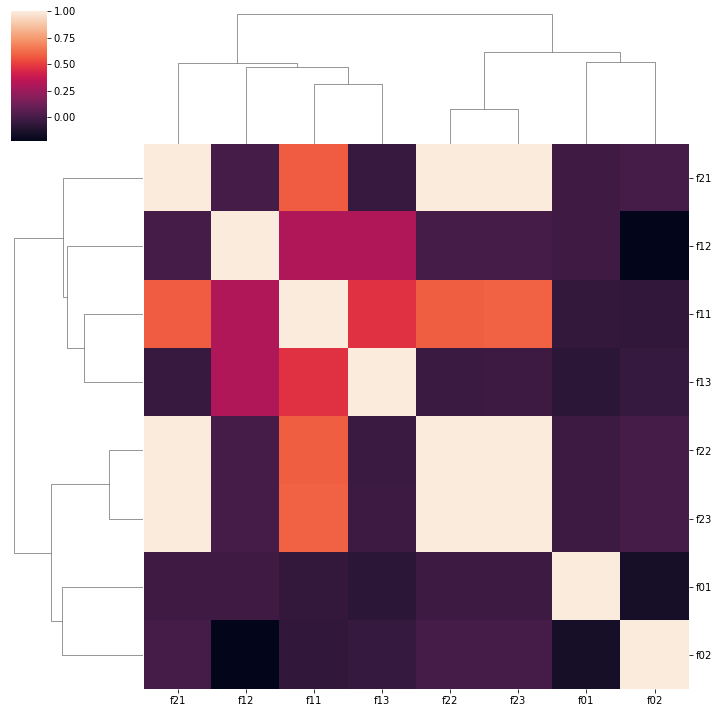

In [61]:
### perform hierarchical clustering of features being most similar to one another so that we can eventually eliminate some to avoid collinearity
from scipy.cluster import hierarchy
from scipy.spatial import distance


corr_arr = np.asarray(features.corr())
linkage = hierarchy.linkage(distance.pdist(corr_arr, 'cityblock'), method='average')

g = sns.clustermap(
    corr_matrix, 
    row_linkage=linkage, 
    col_linkage=linkage, 
    col_cluster=True, 
    figsize=(10,10),
    )
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [45]:
features.corr()

,f01,f02,f11,f12,f13,f21,f22,f23,f24,f25,f31,f41
f01,1.000000,-0.147518,-0.054464,-0.019563,-0.078560,-0.019825,-0.021566,-0.021621,-0.020489,-0.019166,0.132743,0.268122
f02,-0.147518,1.000000,-0.062550,-0.221181,-0.046505,-0.000964,-0.001113,-0.000638,-0.000046,0.000400,0.055376,0.159318
f11,-0.054464,-0.062550,1.000000,0.312952,0.474641,0.580882,0.587098,0.594943,0.602363,0.606125,-0.389477,-0.296645
f12,-0.019563,-0.221181,0.312952,1.000000,0.307630,0.002818,0.002475,0.001963,0.001423,0.001057,-0.012970,-0.022715
f13,-0.078560,-0.046505,0.474641,0.307630,1.000000,-0.040120,-0.033557,-0.028057,-0.027156,-0.028425,-0.151107,-0.248717
f21,-0.019825,-0.000964,0.580882,0.002818,-0.040120,1.000000,0.999686,0.998513,0.996391,0.993595,-0.106946,-0.021244
f22,-0.021566,-0.001113,0.587098,0.002475,-0.033557,0.999686,1.000000,0.999491,0.997808,0.995200,-0.121457,-0.040344
f23,-0.021621,-0.000638,0.594943,0.001963,-0.028057,0.998513,0.999491,1.000000,0.999303,0.997317,-0.143158,-0.058128
f24,-0.020489,-0.000046,0.602363,0.001423,-0.027156,0.996391,0.997808,0.999303,1.000000,0.999251,-0.170087,-0.068987
f25,-0.019166,0.000400,0.606125,0.001057,-0.028425,0.993595,0.995200,0.997317,0.999251,1.000000,-0.194731,-0.073163
